In [33]:
import entrofy.core
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
# add a link to the diversity workflow diagram

In [35]:
cohort_all = pd.read_csv("/Users/maddy/Downloads/WHW/entrofy/data/cohort_all.csv")
cohort_all = cohort_all.drop(['Unnamed: 0'], axis=1)

In [36]:
cohort_all.columns

Index(['ID', 'USA', 'atUW', 'position', 'gender', 'lgbtq', 'nonbin_trans',
       'race_ethnic', 'color', 'language', 'met_climate', 'snow_ice',
       'alpine_forest', 'riv_streams', 'lake_wetlands', 'geo_sediment',
       'quality_waste', 'extreme_event_disaster', 'urban',
       'datasci_model_software', 'fish_aquatic', 'health', 'hydraulics',
       'no_exp_yet', 'seed', 'motivation'],
      dtype='object')

Assign weights and datatypes for entrofy

In [37]:
weights = {
           'USA': 1.0,
           'atUW': 1.0,
           'position': 1.0,
           'gender' : 1.0,
           'lgbtq': 1.0,
           'nonbin_trans': 1.0,
           'color': 1.0,
           'language': 1.0,
           'motivation':10.0,           
           'met_climate': 1.0,
           'snow_ice': 1.0,
           'alpine_forest': 1.0,
           'riv_streams': 1.0,
           'lake_wetlands': 1.0,
           'geo_sediment': 1.0,
           'quality_waste': 1.0,
           'extreme_event_disaster': 1.0,
           'urban': 1.0,
           'datasci_model_software': 1.0,
           'fish_aquatic': 1.0,
           'health': 1.0,
           'hydraulics': 1.0,
           'no_exp_yet': 1.0   
          }
datatypes = {
          'USA': 'categorical',
          'atUW': 'categorical',
          'position': 'categorical',
          'gender' : 'categorical',
          'lgbtq': 'categorical',
          'nonbin_trans': 'categorical',
          'color': 'categorical',
          'language': 'categorical',
          'motivation': 'continuous',
          'met_climate': 'categorical',
          'snow_ice': 'categorical',
          'alpine_forest': 'categorical',
          'riv_streams': 'categorical',
          'lake_wetlands': 'categorical',
          'geo_sediment': 'categorical',
          'quality_waste': 'categorical',
          'extreme_event_disaster': 'categorical',
          'urban': 'categorical',
          'datasci_model_software': 'categorical',
          'fish_aquatic': 'categorical',
          'health': 'categorical',
          'hydraulics': 'categorical',
          'no_exp_yet': 'categorical'
}

In [38]:
mappers = entrofy.core.construct_mappers(cohort_all, weights, datatypes)

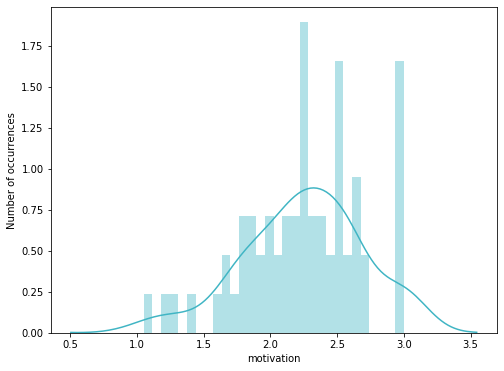

In [43]:
def make_plot_categorical(column_str):
    ax = entrofy.plotting.plot_distribution(cohort_all[cohort_all['seed'] == 0], column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

def make_plot_continuous(column_str):
    ax = entrofy.plotting.plot_distribution(cohort_all[cohort_all['seed'] == 0], column_str,
                                        xtype="continuous",
                                        cmap="YlGnBu", ax=None)

    # create only for participants
    # add details of rubric used
    # describe the essay process here
make_plot_continuous('motivation')# only participants

Create a continuous mapper for the 'motivation' column

In [7]:
#mappers

m_boundaries = [0.0, 1.5, 2.0, 2.5, 3.0]
m_targets = {"Benchmark":0.1, "High":0.15, "Exemplary":0.25, "Mega-Compelling":0.5}
m_column_names =  ["Benchmark", "High", "Exemplary", "Mega-Compelling"]
mappers['motivation'] = entrofy.mappers.ContinuousMapper(cohort_all["motivation"], n_out=4,
                                             boundaries=m_boundaries,
                                             targets=m_targets, column_names = m_column_names)

In [8]:
mappers['USA'].prefix = 'USA'
mappers['atUW'].prefix = 'atUW'
mappers['position'].prefix = 'position'
mappers['gender'].prefix = 'gender'
mappers['nonbin_trans'].prefix = 'nonbin_Trans'
mappers['lgbtq'].prefix = 'lgbtq'
mappers['color'].prefix = 'race_ethnic'
mappers['language'].prefix = 'language'
mappers['motivation'].prefix = 'motivation'
mappers['met_climate'].prefix = 'met_climate'
mappers['snow_ice'].prefix = 'snow_ice'
mappers['alpine_forest'].prefix = 'alpine_forest'
mappers['riv_streams'].prefix = 'riv_streams'
mappers['lake_wetlands'].prefix = 'lake_wetlands'
mappers['geo_sediment'].prefix = 'geo_sediment'
mappers['quality_waste'].prefix = 'quality_waste'
mappers['extreme_event_disaster'].prefix = 'extreme_event_disaster'
mappers['urban'].prefix = 'urban'
mappers['datasci_model_software'].prefix = 'datasci_model_software'
mappers['fish_aquatic'].prefix = 'fish_aquatic'
mappers['health'].prefix = 'health'
mappers['hydraulics'].prefix = 'hydraulics'
mappers['no_exp_yet'].prefix = 'no_exp_yet'

### Set diversity targets for geography, institution and career stage

Set to global population numbers (as with other diversity targets)

Objective: train a cohort that represents the global population in order to advance research and technology for global water problems

In [9]:
new_targets = [0.95, 0.05]
sorted_keys = np.sort(list(mappers['USA'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['USA'].targets[key] = t

Objective: include UW & UW Freshwater Initiative participants (target =50%) and expand network of UW participants beyond UW (50%)

In [10]:
new_targets = [0.50, 0.50]
sorted_keys = np.sort(list(mappers['atUW'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['atUW'].targets[key] = t

Objective: 50% graduate student/postdoc, uniform distribution of all other career stages

In [11]:
cohort_all["position"].unique()

array(["Master's student",
       'Software professional (e.g. developer, infrastructure research, industry)',
       'Professional scientist (e.g. government, non-profit, industry scientist)',
       'Academic researcher (e.g. research scientist, data scientist)',
       'PhD student', 'Academic faculty', 'Postdoc',
       'Undergraduate student', 'Independent Consulting Data Scientist',
       'Waterhackweek (e.g. Researcher, Staff, Consultant)',
       'Masters student', 'eScience Staff '], dtype=object)

In [12]:
print(mappers['position'].targets.keys())
print(cohort_all["position"].value_counts())
len(mappers["position"].targets.keys())

dict_keys(['PhD student', "Master's student", 'Academic researcher (e.g. research scientist, data scientist)', 'Professional scientist (e.g. government, non-profit, industry scientist)', 'Undergraduate student', 'Academic faculty', 'Waterhackweek (e.g. Researcher, Staff, Consultant)', 'Postdoc', 'Software professional (e.g. developer, infrastructure research, industry)', 'Masters student', 'Independent Consulting Data Scientist', 'eScience Staff '])
PhD student                                                                  28
Master's student                                                             13
Academic researcher (e.g. research scientist, data scientist)                11
Professional scientist (e.g. government, non-profit, industry scientist)      8
Undergraduate student                                                         8
Academic faculty                                                              5
Waterhackweek (e.g. Researcher, Staff, Consultant)                

12

In [13]:
num_not_grad_categories=len(mappers["position"].targets.keys())-1
print(num_not_grad_categories)
not_grad_target=0.5
p=not_grad_target/num_not_grad_categories-0.000001 #uniform distribution for categories that are not grad students
new_targets = [0.5,p,p,p,p,p,p,p,p,p,p,p]
sorted_keys = np.sort(list(mappers['position'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['position'].targets[key] = t

11


### Set diversity targets for Demographics

Objective: train a cohort that represents the global population in order to advance research and technology for global water problems

In [14]:
print(mappers['gender'].targets.keys())
new_targets = [0.45, 0.45,0.1]
sorted_keys = np.sort(list(mappers['gender'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['gender'].targets[key] = t

dict_keys(['Male', 'Female', 'Non-binary/Third gender or Prefer not to say'])


In [15]:
print(mappers['nonbin_trans'].targets.keys())
new_targets = [0.97, 0.03]
sorted_keys = np.sort(list(mappers['nonbin_trans'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['nonbin_trans'].targets[key] = t

dict_keys(['Binary or Prefer not to say', 'Non-binary/third gender'])


In [16]:
print(mappers['lgbtq'].targets.keys())
new_targets = [0.87, 0.13]
sorted_keys = np.sort(list(mappers['lgbtq'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['lgbtq'].targets[key] = t

dict_keys(['No or Prefer not to say', 'Yes'])


In [17]:
print(mappers['color'].targets.keys())
new_targets = [0.1, 0.8,0.1]
sorted_keys = np.sort(list(mappers['color'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['color'].targets[key] = t

dict_keys(['White, European American, or Caucasian', 'People of Color', 'No answer or Prefer not to say'])


In [18]:
mappers['color'].targets

{'White, European American, or Caucasian': 0.1,
 'People of Color': 0.8,
 'No answer or Prefer not to say': 0.1}

In [19]:
print(mappers['language'].targets.keys())
new_targets = [0.05, 0.95]
sorted_keys = np.sort(list(mappers['language'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['language'].targets[key] = t
#mappers['language'].targets

dict_keys(['1', '0'])


In [20]:
mappers['language'].targets

{'1': 0.95, '0': 0.05}

In [21]:
new_targets = [0.50, 0.50]

sorted_keys = np.sort(list(mappers['no_exp_yet'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['no_exp_yet'].targets[key] = t

sorted_keys = np.sort(list(mappers['datasci_model_software'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['datasci_model_software'].targets[key] = t

sorted_keys = np.sort(list(mappers['extreme_event_disaster'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['extreme_event_disaster'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['fish_aquatic'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['fish_aquatic'].targets[key] = t

sorted_keys = np.sort(list(mappers['geo_sediment'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['geo_sediment'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['health'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['health'].targets[key] = t

sorted_keys = np.sort(list(mappers['hydraulics'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['hydraulics'].targets[key] = t

sorted_keys = np.sort(list(mappers['lake_wetlands'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['lake_wetlands'].targets[key] = t

sorted_keys = np.sort(list(mappers['met_climate'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['met_climate'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['quality_waste'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['quality_waste'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['riv_streams'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['riv_streams'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['snow_ice'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['snow_ice'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['urban'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['urban'].targets[key] = t

### Sorting out auto + semi-manual + manual inclusion steps

In [22]:
total_humans_attending=61
target_new_attendees=40
whw_team=len(cohort_all[cohort_all['ID'] >= 100]) #instructor/team who will be in attendence seed =1
count_entofy_output=target_new_attendees+whw_team
retention_issues=10
overinvite=total_humans_attending-whw_team-target_new_attendees+retention_issues
print(count_entofy_output)
print(overinvite)

60
11


### Team Members Selected
Get a list of event planners and team who will be in attendance. These will be selected for sure, and inform the optimization of the remainder of the selection.

In [23]:
team_seed_pre_selects = []
print(cohort_all.shape)
print(cohort_all.index)
for i in range(len(cohort_all)):
    if cohort_all.loc[i,'seed']==1:
      team_seed_pre_selects.append(cohort_all.index[i])
print(team_seed_pre_selects)

(81, 26)
RangeIndex(start=0, stop=81, step=1)
[62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80]


## Cohort Selected to Opimtize for Diversity 
Individuals are selected as a function of targets set during the initialization of the mappers, including the relative weight of each mapper, and the target distibution of each category in the mapped variable.  Essay scores are a continuous variable mapped to an exponential increasing distribution, where higher scores are more likely to be selected. 

In [24]:
opt_outs = []
random_seed = 3
target_new_attendees=40
count_output=target_new_attendees+14

idx, max_score = entrofy.core.entrofy(cohort_all, count_entofy_output,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=random_seed,
                                      opt_outs = opt_outs,
                                      pre_selects = team_seed_pre_selects)
print(max_score)

351.42514433177445


In [25]:
cohort_all['entrofy_selected']=0
for i in range(len(idx)):
    cohort_all.loc[idx[i],'entrofy_selected']=1

### Visualizing Entrofy Results

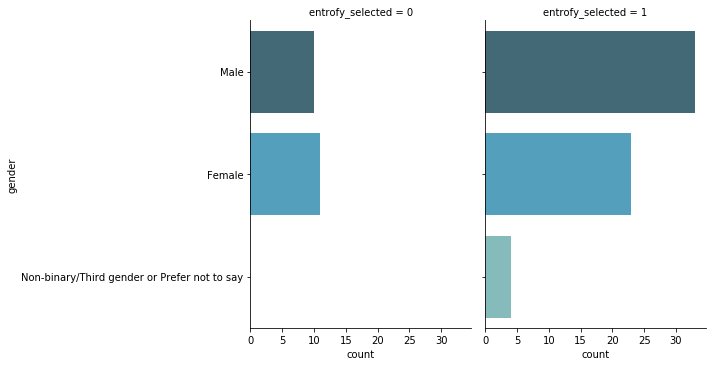

In [26]:
sns.catplot(y="gender", kind="count", palette="GnBu_d", col="entrofy_selected", data=cohort_all)

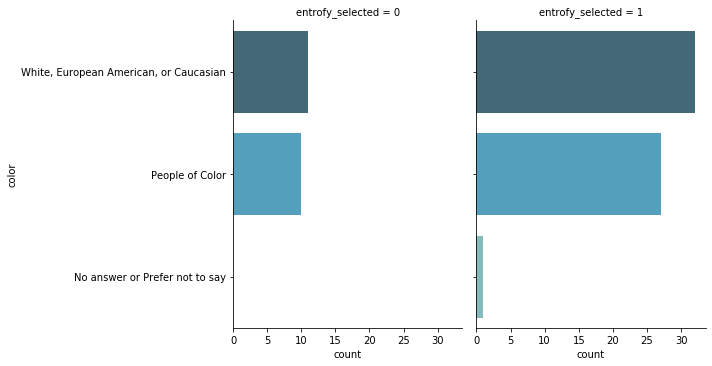

In [27]:
sns.catplot(y="color", kind="count", palette="GnBu_d", col="entrofy_selected", data=cohort_all);

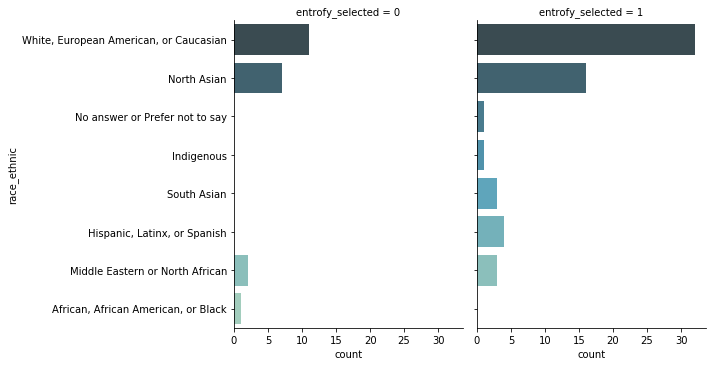

In [28]:
sns.catplot(y="race_ethnic", kind="count", palette="GnBu_d", col="entrofy_selected", data=cohort_all);

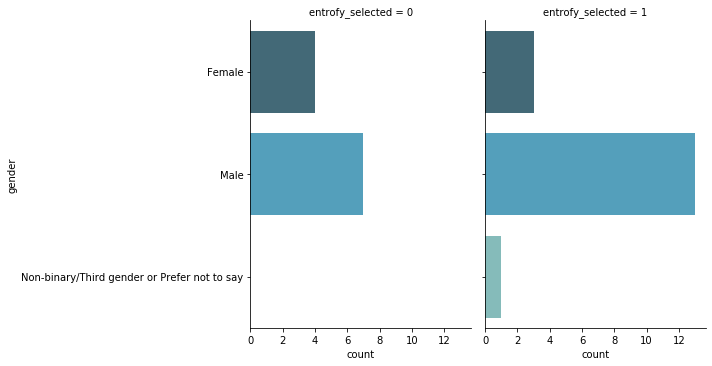

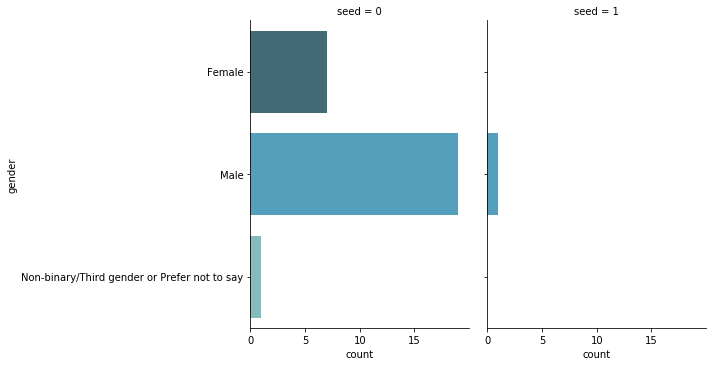

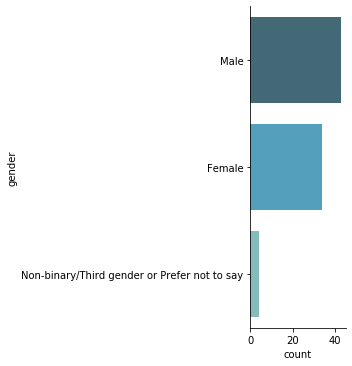

In [29]:
sns.catplot(y="gender", kind="count", palette="GnBu_d", col="entrofy_selected", data=cohort_all.loc[cohort_all["position"]=='PhD student']);
sns.catplot(y="gender", kind="count", palette="GnBu_d", col="seed", data=cohort_all.loc[cohort_all["position"]=='PhD student']);
sns.catplot(y="gender", kind="count", palette="GnBu_d",  data=cohort_all);

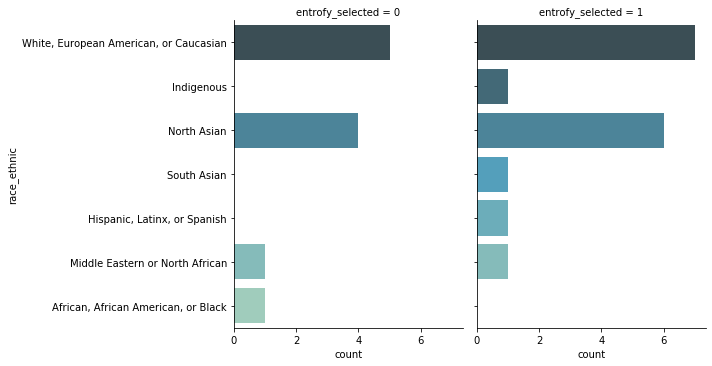

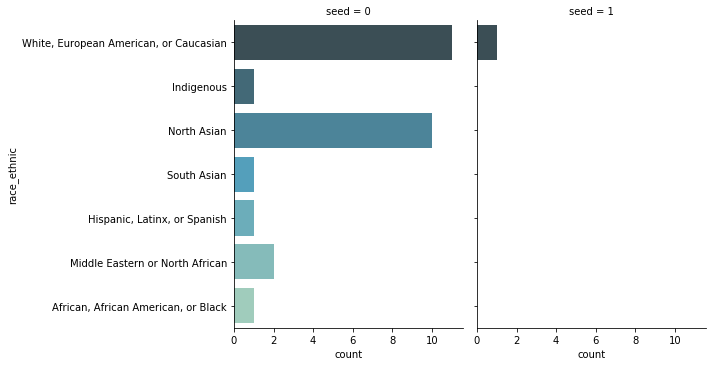

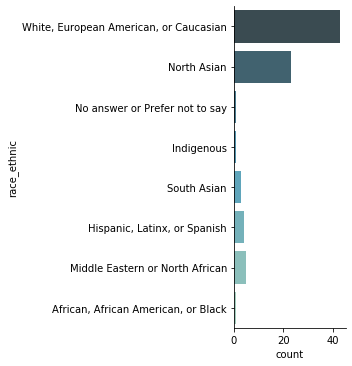

In [30]:
sns.catplot(y="race_ethnic", kind="count", palette="GnBu_d", col="entrofy_selected", data=cohort_all.loc[cohort_all["position"]=='PhD student']);
sns.catplot(y="race_ethnic", kind="count", palette="GnBu_d", col="seed", data=cohort_all.loc[cohort_all["position"]=='PhD student']);
sns.catplot(y="race_ethnic", kind="count", palette="GnBu_d",  data=cohort_all);

In [31]:
cohort_all.to_csv("cohort_all_after_entrofy.csv")